In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [261]:
df=pd.read_csv('bank+Marketing.csv')


In [262]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [263]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [264]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [265]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [266]:
df.deposit.value_counts()

,count
deposit,
no,5873
yes,5289


In [267]:
df.education.dtype

dtype('O')

<Axes: xlabel='age', ylabel='Density'>

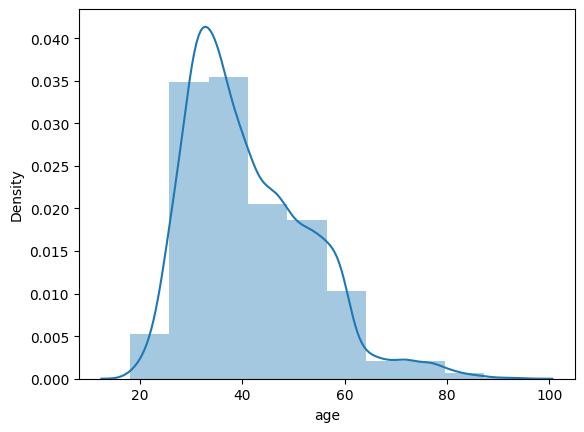

In [268]:
sns.distplot(df.age,bins=10)

In [269]:
from scipy.stats import kurtosis
from scipy.stats import skew

K=kurtosis(df['age'])
S=skew(df['age'])
print('k:',K)
print('s:',S)

k: 0.6207244197145583
s: 0.8626636888266407


<Axes: xlabel='age', ylabel='Density'>

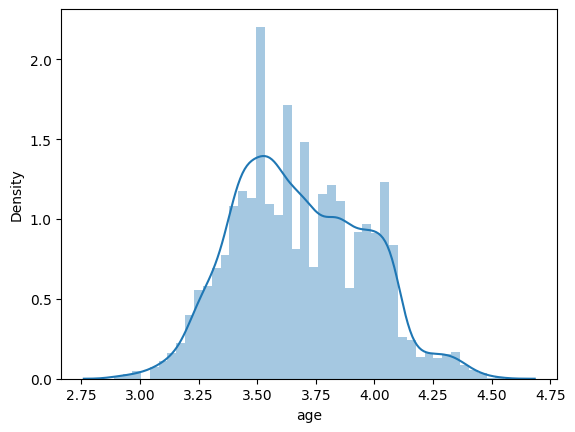

In [270]:
df['age']=df['age'].apply(np.log)

sns.distplot(df['age'])

<Axes: ylabel='age'>

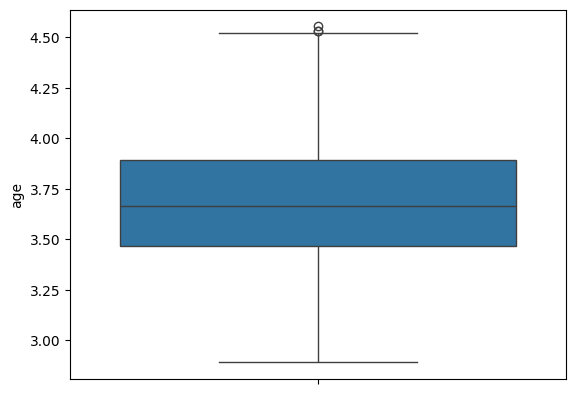

In [271]:
sns.boxplot(df.age)

<Axes: xlabel='balance', ylabel='Density'>

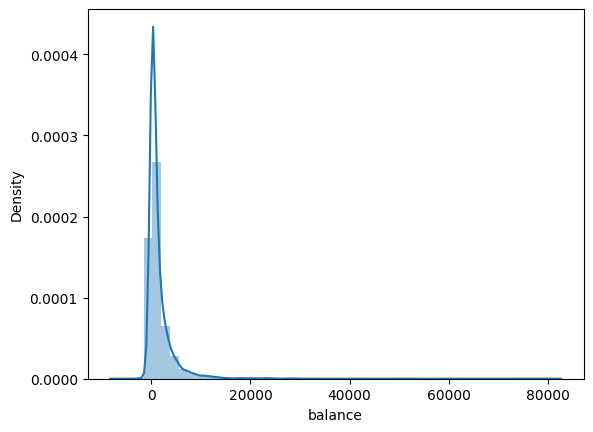

In [272]:
sns.distplot(df.balance)

<Axes: ylabel='balance'>

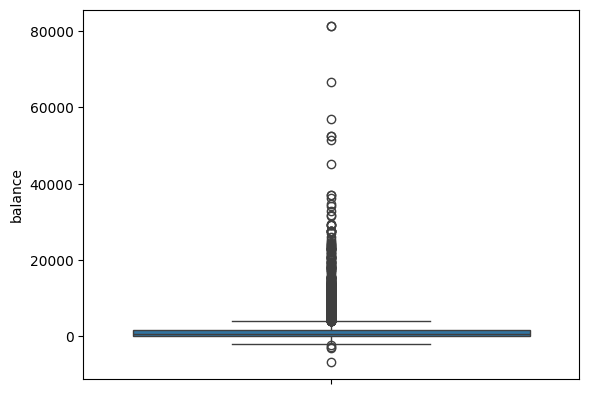

In [273]:
sns.boxplot(df.balance)

In [274]:
df.balance.describe()

,balance
count,11162.000000
mean,1528.538524
std,3225.413326
min,-6847.000000
25%,122.000000
50%,550.000000
75%,1708.000000
max,81204.000000


In [275]:
K=kurtosis(df['balance'])
S=skew(df['balance'])
print('k:',K)
print('s:',S)

k: 126.80394496305712
s: 8.223513810011928


<Axes: xlabel='balance', ylabel='Density'>

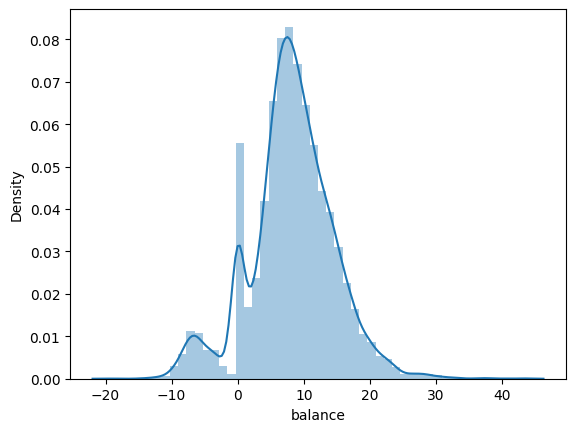

In [276]:
df['balance']=df['balance'].apply(np.cbrt)

sns.distplot(df['balance'])

<Axes: xlabel='day', ylabel='Density'>

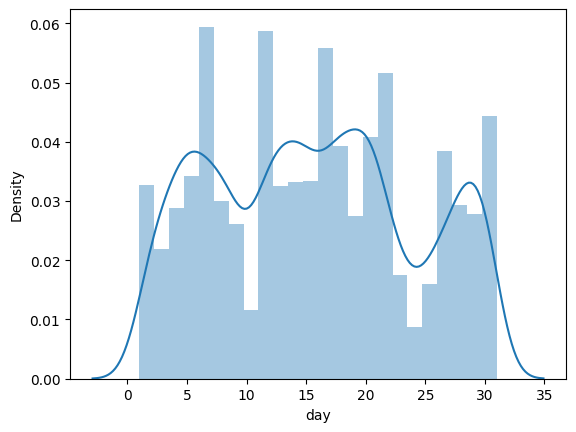

In [277]:
sns.distplot(df.day)

<Axes: ylabel='day'>

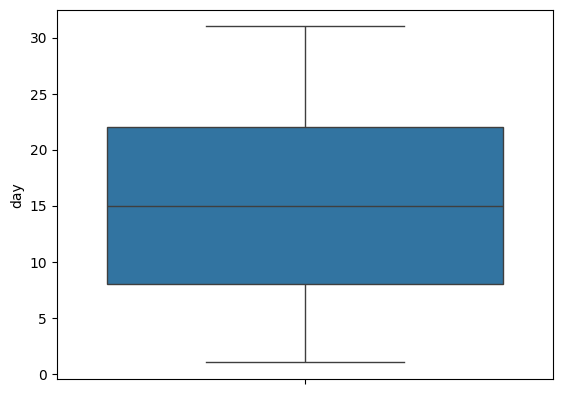

In [278]:
sns.boxplot(df.day)

<Axes: xlabel='pdays', ylabel='Density'>

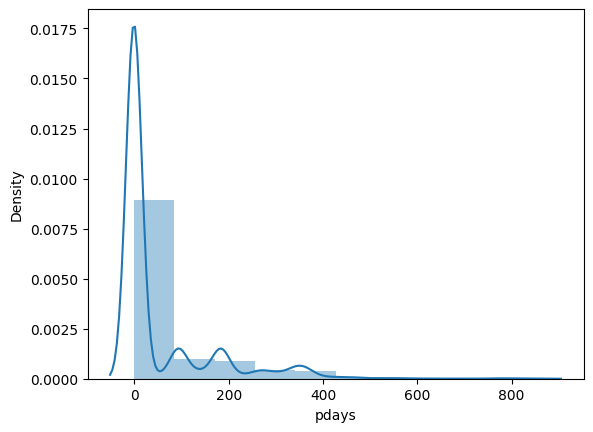

In [279]:
sns.distplot(df.pdays ,bins=10)

<Axes: xlabel='pdays', ylabel='Density'>

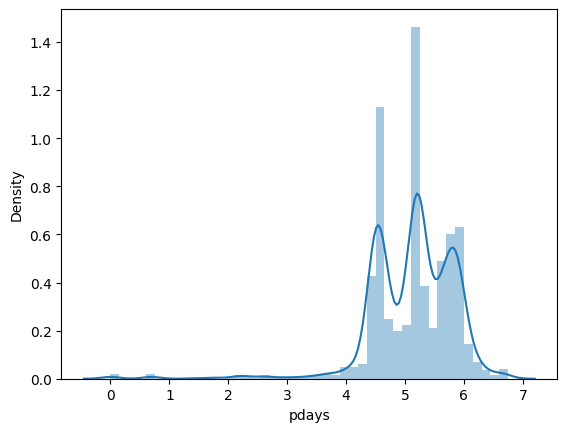

In [280]:
df['pdays']=df['pdays'].apply(np.log)
sns.distplot(df['pdays'])

<Axes: ylabel='pdays'>

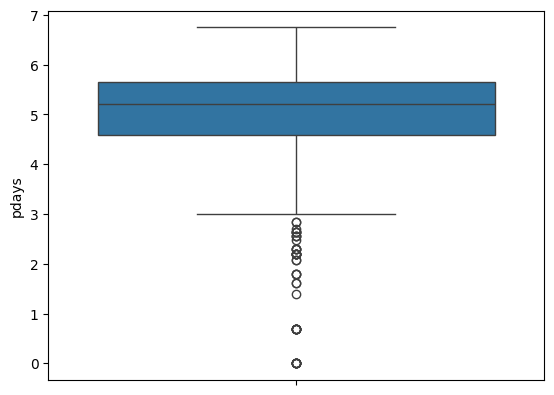

In [281]:
sns.boxplot(df.pdays)

<Axes: xlabel='duration', ylabel='Density'>

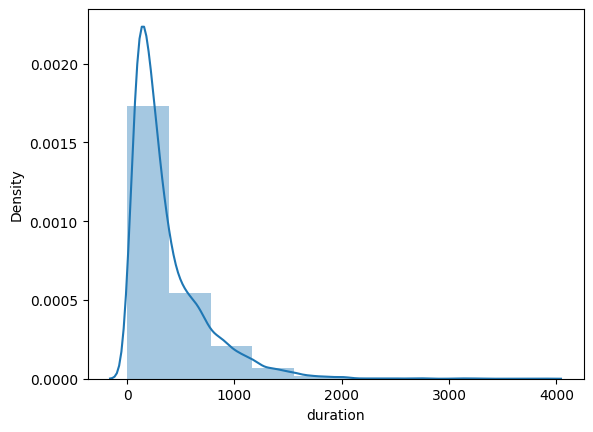

In [282]:
sns.distplot(df.duration,bins=10)

<Axes: xlabel='duration', ylabel='Density'>

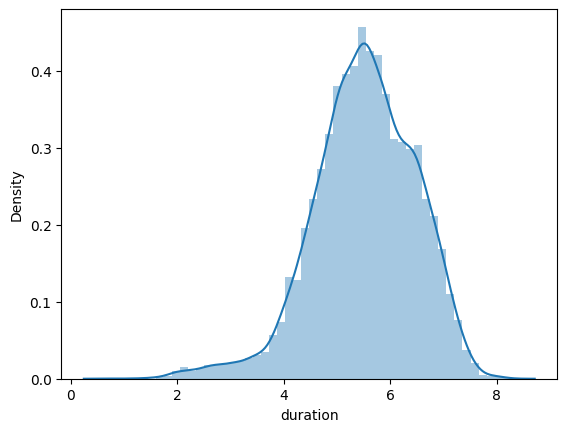

In [283]:
df['duration']=df['duration'].apply(np.log)
sns.distplot(df['duration'])

<Axes: ylabel='duration'>

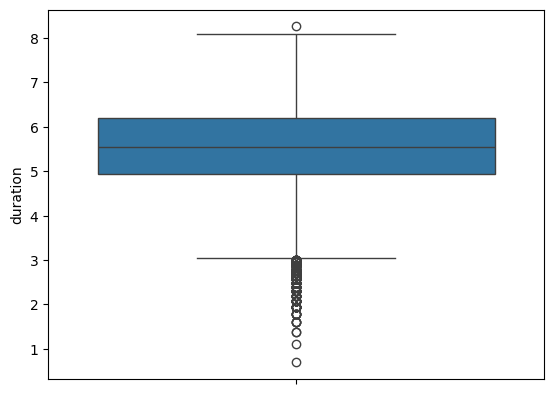

In [284]:
sns.boxplot(df.duration)

<Axes: xlabel='campaign', ylabel='Density'>

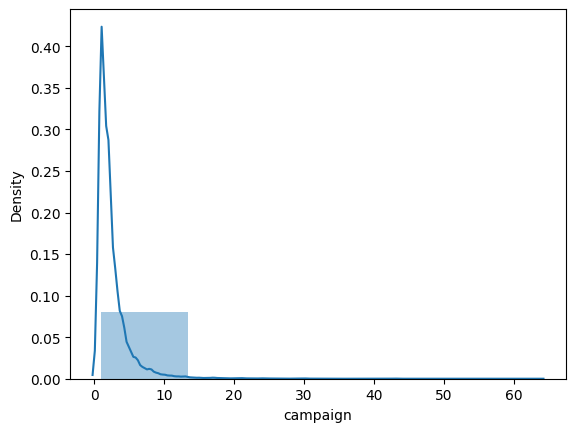

In [285]:
sns.distplot(df.campaign,bins=5)

<Axes: xlabel='campaign', ylabel='Density'>

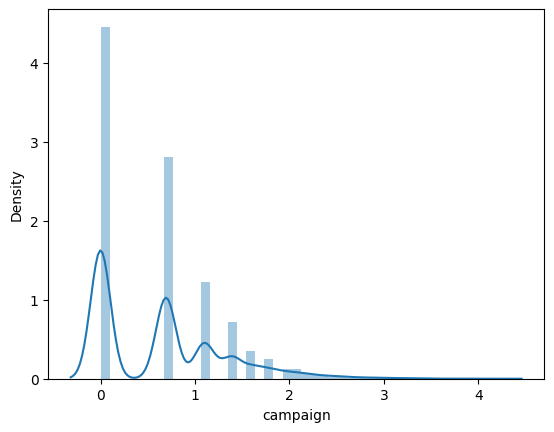

In [286]:
df['campaign']=df['campaign'].apply(np.log)
sns.distplot(df['campaign'])

<Axes: ylabel='campaign'>

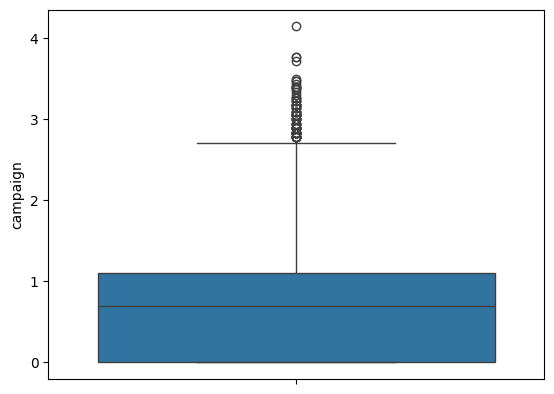

In [287]:
sns.boxplot(df.campaign)

<Axes: xlabel='previous', ylabel='Density'>

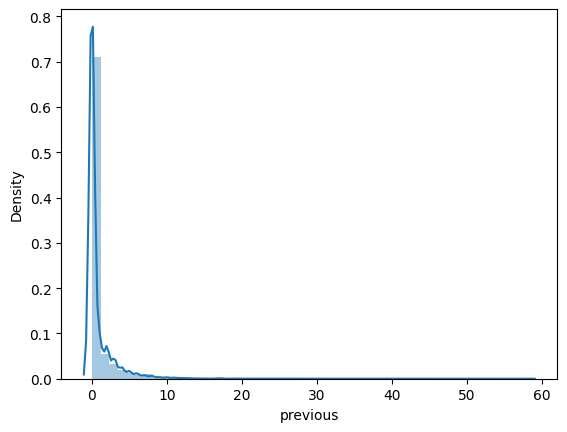

In [288]:
sns.distplot(df.previous)

<Axes: xlabel='previous', ylabel='Density'>

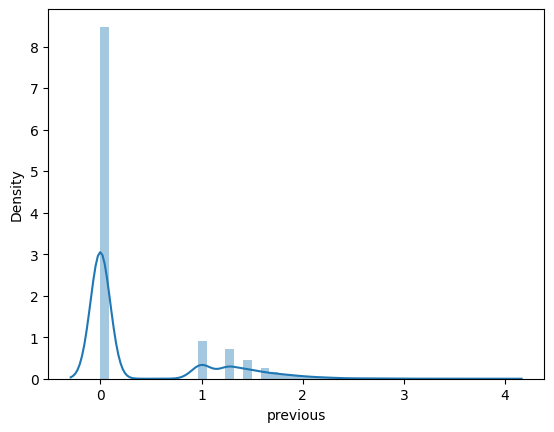

In [289]:
df['previous']=df['previous'].apply(np.cbrt)
sns.distplot(df['previous'])

<Axes: ylabel='previous'>

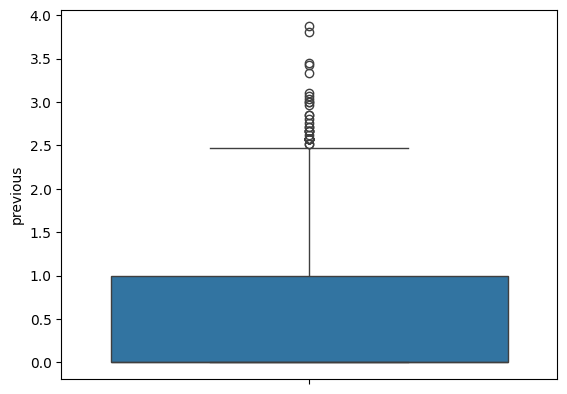

In [290]:
sns.boxplot(df.previous)

In [291]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [292]:
df.poutcome.value_counts()

,count
poutcome,
unknown,8326
failure,1228
success,1071
other,537


<Axes: xlabel='month'>

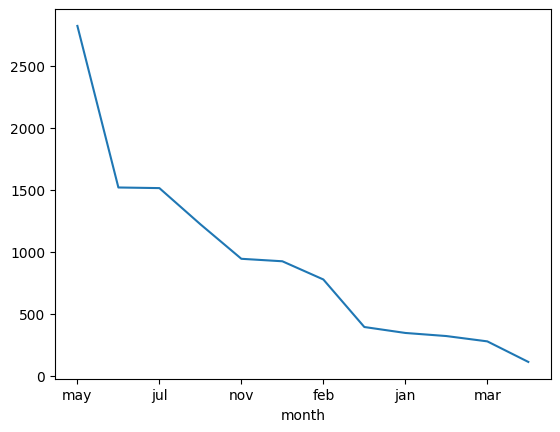

In [293]:
df.month.value_counts().plot()

In [294]:
df.deposit.value_counts()

,count
deposit,
no,5873
yes,5289


In [295]:
# Convert 'deposit' column to numeric (assuming 'yes' is 1 and 'no' is 0)
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Now calculate the mean
df[['job','deposit']].groupby('job').mean().sort_values('deposit',ascending=True)

,deposit
job,
blue-collar,0.364198
entrepreneur,0.375000
housemaid,0.397810
services,0.399783
technician,0.460779
self-employed,0.461728
admin.,0.473013
unknown,0.485714
management,0.507015


In [296]:
df['job']=df['job'].replace(['management','technician','entrepreneur','blue-collar','unknown','retired','admin.','services','self-employed','unemployed','student'],'rare',regex=True)

In [297]:
jobmapping={'student':3,'retired':2,'unemployed':1,'rare':0}
df['job']=df['job'].map(jobmapping)

In [298]:
df['job'].value_counts()

,count
job,
0.0,10888


In [299]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [300]:
df[['marital','deposit']].groupby('marital').mean().sort_values('deposit',ascending=True)

,deposit
marital,
married,0.433790
divorced,0.481052
single,0.543491


In [301]:
statusmapping={'married':1,'divorced':2,'single':3}
df['marital']=df['marital'].map(statusmapping)

In [302]:
df['marital']

,marital
0,1
1,1
2,1
3,1
4,1
...,...
11157,3
11158,1
11159,3
11160,1


In [303]:
df[['education','deposit']].groupby('education').mean().sort_values('deposit',ascending=True)

,deposit
education,
primary,0.394000
secondary,0.447407
unknown,0.507042
tertiary,0.541068


In [304]:
educationmapping={'primary':1,'secondary':2,'tertiary':4,'unknown':3}
df['education']=df['education'].map(educationmapping)

In [305]:
df['education']

,education
0,2
1,2
2,2
3,2
4,4
...,...
11157,1
11158,2
11159,2
11160,2


In [306]:
df.deposit

,deposit
0,1
1,1
2,1
3,1
4,1
...,...
11157,0
11158,0
11159,0
11160,0


In [307]:
df[['deposit','default']].groupby('default').mean().sort_values('deposit',ascending=True)

,deposit
default,
yes,0.309524
no,0.476351


In [308]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [309]:
defaultmapping={'yes':2,'no':1}
df['default']=df['default'].map(defaultmapping)

In [310]:
df.loan.value_counts()

,count
loan,
no,9702
yes,1460


In [311]:
df[['deposit','loan']].groupby('loan').mean().sort_values('deposit',ascending=True)

,deposit
loan,
yes,0.331507
no,0.495259


In [312]:
loanmapping={'yes':2,'no':1}
df['loan']=df['loan'].map(loanmapping)

In [313]:
df[['deposit','contact']].groupby('contact').mean().sort_values('deposit',ascending=True)

,deposit
contact,
unknown,0.225916
telephone,0.503876
cellular,0.543273


In [314]:
contactmapping={'unknown':1,'telephone':2,'cellular':3}
df['contact']=df['contact'].map(contactmapping)

In [315]:
df['contact'].value_counts()

,count
contact,
3,8042
1,2346
2,774


In [316]:
df[['deposit','poutcome']].groupby('poutcome').mean().sort_values('deposit',ascending=True)

,deposit
poutcome,
unknown,0.406678
failure,0.503257
other,0.571695
success,0.913165


In [317]:
poutcomemap={'unknown':1,'failure':2,'other':3,'success':4}
df['poutcome']=df['poutcome'].map(poutcomemap)

In [318]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,4.077537,0.0,1,2,1,13.281815,yes,1,1,5,may,6.948897,0.000000,NaN,0.0,1,1
1,4.025352,0.0,1,2,1,3.556893,no,1,1,5,may,7.290975,0.000000,NaN,0.0,1,1
2,3.713572,0.0,1,2,1,10.829321,yes,1,1,5,may,7.236339,0.000000,NaN,0.0,1,1
3,4.007333,0.0,1,2,1,13.528518,yes,1,1,5,may,6.361302,0.000000,NaN,0.0,1,1
4,3.988984,0.0,1,4,1,5.687734,no,1,1,5,may,6.511745,0.693147,NaN,0.0,1,1


In [319]:
df[['deposit','month']].groupby('month').mean().sort_values('deposit',ascending=True)

,deposit
month,
may,0.327550
jan,0.412791
jul,0.414135
nov,0.427359
jun,0.446809
aug,0.452930
feb,0.568299
apr,0.625135
oct,0.823980


In [320]:
df['month']=df['month'].replace(['mar','dec','sep','oct'],2,regex=True)
df['month']=df['month'].replace(['apr','feb','aug','jun'],1,regex=True)
df['month']=df['month'].replace(['nov','jul','jan','may'],0,regex=True)

In [334]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X = df[['age','job','marital','education','default','balance',
        'loan','contact','month','duration','campaign',
        'poutcome']]  #independent columns
y = df['deposit']  #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

In [335]:
print(model.feature_importances_)

[0.14090955 0.         0.03500167 0.0465278  0.00223006 0.15042974
 0.02151691 0.01840517 0.0718191  0.29027714 0.0634494  0.15943346]


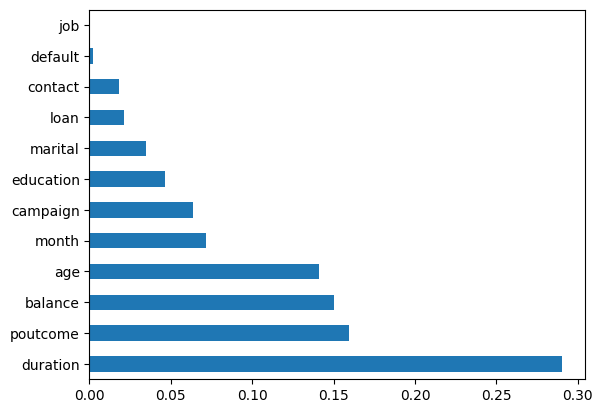

In [336]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [337]:
nrows=len(df.index)
percentage=round((nrows*70/100))
trainingData=df.iloc[:percentage]
testingData=df.iloc[percentage:,:]

print("Number of training data examples "+str(len(trainingData.index)))
print("Number of testing data examples "+str(len(testingData.index)))

Number of training data examples 1950
Number of testing data examples 836


In [338]:
train_x=trainingData[['age','loan','month','poutcome','balance','campaign','contact','duration','education']]
train_y=trainingData['deposit']


test_x=testingData[['age','loan','month','poutcome','balance','campaign','contact','duration','education']]
test_y=testingData['deposit']

train_x.head()


,age,loan,month,poutcome,balance,campaign,contact,duration,education
890,3.737670,2,2,3,-6.274305,0.000000,2,6.251904,2
891,3.496508,1,2,2,15.101533,0.000000,2,4.969813,2
899,4.025352,1,2,4,8.382465,0.000000,1,6.249975,2
933,3.526361,1,0,2,9.651317,0.000000,1,4.736198,4
951,3.970292,1,0,4,13.140488,0.693147,3,6.994850,4


In [339]:
from sklearn.tree import DecisionTreeClassifier



In [340]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,max_depth=3)
clf_gini.fit(train_x, train_y)  #fit the model

DecisionTreeClassifier(max_depth=3, random_state=0)

In [341]:
y_pred_gini = clf_gini.predict(test_x)

[Text(0.4090909090909091, 0.875, 'x[7] <= 4.094\ngini = 0.078\nsamples = 1950\nvalue = [79, 1871]'),
 Text(0.18181818181818182, 0.625, 'x[6] <= 1.5\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.6363636363636364, 0.625, 'x[7] <= 4.732\ngini = 0.064\nsamples = 1933\nvalue = [64, 1869]'),
 Text(0.45454545454545453, 0.375, 'x[3] <= 3.5\ngini = 0.378\nsamples = 87\nvalue = [22, 65]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.477\nsamples = 51\nvalue = [20, 31]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(0.8181818181818182, 0.375, 'x[3] <= 2.5\ngini = 0.044\nsamples = 1846\nvalue = [42, 1804]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.098\nsamples = 617\nvalue = [32, 585]'),
 Text(0.9090909090909091, 0.125, 'gini = 0.016\nsamples = 1229\nvalue = [10, 1219]')]

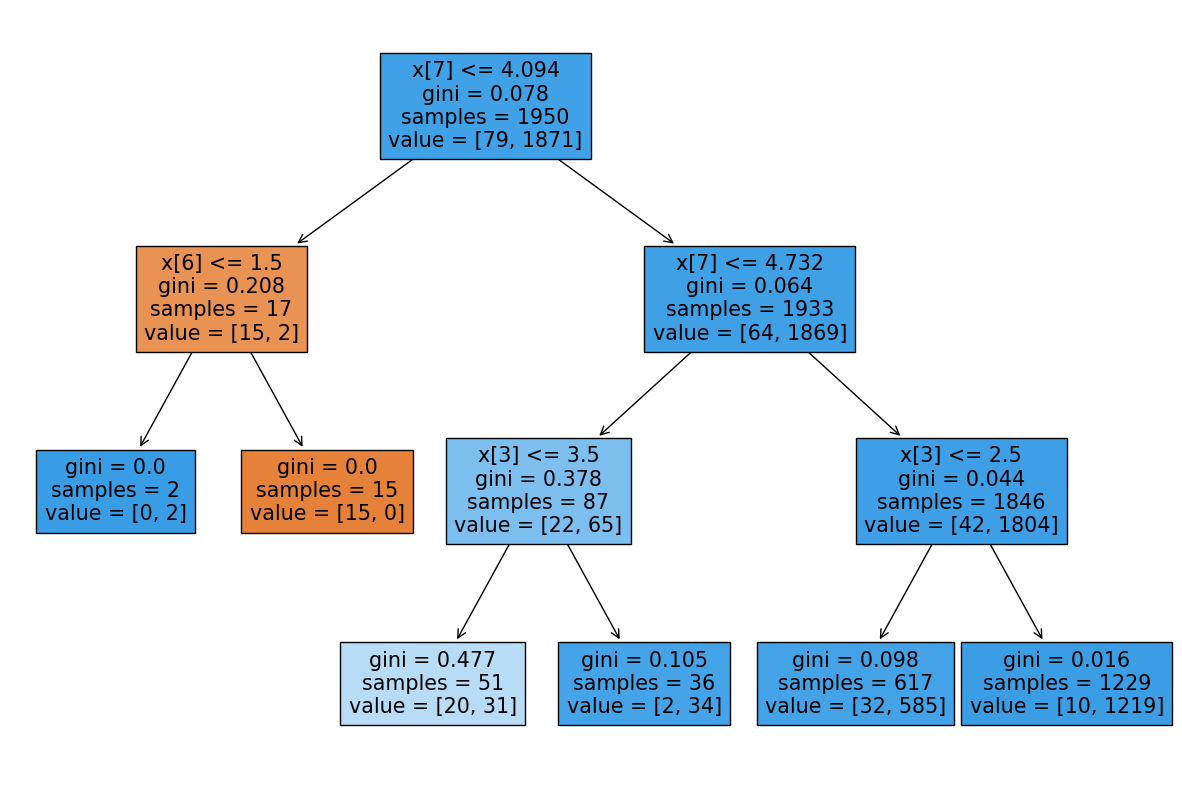

In [342]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini,filled=True)

In [343]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(test_y, y_pred_gini)))


Model accuracy score with criterion gini index: 0.1136


In [344]:
y_pred_train_gini = clf_gini.predict(train_x)
y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1])

In [345]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train_gini)))

Training-set accuracy score: 0.9672


In [346]:
from sklearn.metrics import classification_report, confusion_matrix


In [347]:
print(classification_report(test_y, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20       836
           1       0.00      0.00      0.00         0

    accuracy                           0.11       836
   macro avg       0.50      0.06      0.10       836
weighted avg       1.00      0.11      0.20       836



In [348]:
cm = confusion_matrix(test_y, y_pred_gini)
print(cm)
print("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[ 95 741]
 [  0   0]]
Accuracy of prediction: 0.114


In [349]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(train_x, train_y)

RandomForestClassifier(n_estimators=300)

In [350]:
rfc_pred = rfc.predict(test_x)

In [351]:
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34       836
           1       0.00      0.00      0.00         0

    accuracy                           0.21       836
   macro avg       0.50      0.10      0.17       836
weighted avg       1.00      0.21      0.34       836



In [352]:
cm=confusion_matrix(test_y,rfc_pred)
print(cm)
print("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[173 663]
 [  0   0]]
Accuracy of prediction: 0.207
